# R32-bmimBF4: Comparaing Binary Parameters to Temperature 

In [1]:
# import functions
import idaes
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pyomo.environ import (Constraint,
                           Var,
                           ConcreteModel,
                           Expression,
                           Param,
                           Objective,
                           SolverFactory,
                           TransformationFactory,
                           value)

from idaes.core import FlowsheetBlock
import idaes.logger as idaeslog
from pyomo.opt import TerminationCondition, SolverStatus
# Import the Generic Parameter Block
from idaes.generic_models.properties.core.generic.generic_property import (
        GenericParameterBlock)
# Import unit models from the model library
from idaes.generic_models.unit_models import Flash
# Import degrees of freedom tool
from idaes.core.util.model_statistics import degrees_of_freedom
# parmest (binary_param2)
from binary_param2 import binary_params_peng
# import pressure and plot functions
from binary_fitting_functions import calc_outlet_xP
from binary_fitting_functions import plot_sens_analysis

In [2]:
# from HFC32_emimTf2N_PR import configuration
from HFC32_bmimBF4_PR import configuration

In [3]:
#need to make excel csv for 125
data = pd.read_csv('R32_bmimBF4.csv')
# print(data)

In [4]:
# 283
data_283= data[(data.temperature > 282) & (data.temperature< 284)]

# 298
data_298 = data[(data.temperature > 297) & (data.temperature< 299)]
data_298 = data_298.reset_index(drop=True)

# 323
data_323 = data[(data.temperature > 322) & (data.temperature< 324)]
data_323 = data_323.reset_index(drop=True)

# 323
data_348 = data[(data.temperature > 347) & (data.temperature< 349)]
data_348 = data_348.reset_index(drop=True)

In [5]:
m = ConcreteModel()
m.fs = FlowsheetBlock(default={"dynamic": False})
m.fs.properties = GenericParameterBlock(default=configuration)
m.fs.F101 = Flash(default={"property_package": m.fs.properties,
                           "has_heat_transfer": True,
                           "has_pressure_change": True})
DOF_initial = degrees_of_freedom(m)
print('The initial DOF is {0}'.format(DOF_initial))

2021-04-06 15:38:41 [INFO] idaes.generic_models.properties.core.generic.generic_property: DEPRECATED - definiton of generic property packages is moving to using static classes instead of modules. Please refer to the IDAES documentation.
The initial DOF is 7


### T = 283 K

In [6]:
# from HFC32_emimTf2N_PR import configuration
binary_params_peng(data_283,configuration, 'R32', 'bmimBF4', "x_R32", "x_bmimBF4", 
    init_temp = 283.2, init_press = 399500, init_x_c1 = 0.374 , init_x_c2 = 0.626 ,
    init_kappa_2_1 = -0.019, init_kappa_1_2 =  -0.007, eps = 0.1, scaling_fac = 1e-9, read=False)

2021-04-06 15:38:42 [INFO] idaes.generic_models.properties.core.generic.generic_property: DEPRECATED - definiton of generic property packages is moving to using static classes instead of modules. Please refer to the IDAES documentation.
2021-04-06 15:38:42 [INFO] idaes.init.fs.state_block: Property package initialization: optimal - Optimal Solution Found.
2021-04-06 15:38:42 [INFO] idaes.generic_models.properties.core.generic.generic_property: DEPRECATED - definiton of generic property packages is moving to using static classes instead of modules. Please refer to the IDAES documentation.
2021-04-06 15:38:42 [INFO] idaes.init.fs.state_block: Property package initialization: optimal - Optimal Solution Found.
2021-04-06 15:38:42 [INFO] idaes.generic_models.properties.core.generic.generic_property: DEPRECATED - definiton of generic property packages is moving to using static classes instead of modules. Please refer to the IDAES documentation.
2021-04-06 15:38:42 [INFO] idaes.init.fs.state_

In [7]:
k12_283 = 0.0056259829019000545
k21_283 = -0.01895073268056925

In [8]:
R32_x,P= calc_outlet_xP(data,m,"R32", "bmimBF4", k21_283, k12_283,verbose=True)

The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0


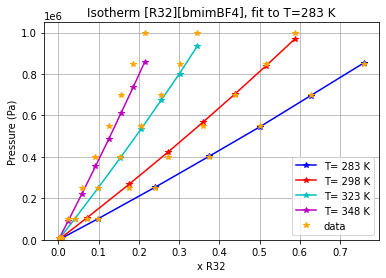

In [9]:
# plots with data - model as lines --- need to make this into a function that splits up the T's
plt.plot(R32_x[0:7],P[0:7],"b*-",label="T= 283 K")  
plt.plot(R32_x[7:15],P[7:15],"r*-",label="T= 298 K") 
plt.plot(R32_x[15:23],P[15:23],"c*-",label="T= 323 K") 
plt.plot(R32_x[23:],P[23:],"m*-",label="T= 348 K")
plt.plot(data["x_R32"],data["pressure"],"*",color='orange',label="data")  
plt.title('Isotherm [R32][bmimBF4], fit to T=283 K')
plt.ylabel('Pressure (Pa)')
plt.xlabel('x R32')
plt.grid(True)
plt.ylim(0,)
plt.legend()
plt.show()

### T = 298 K

In [10]:
# from HFC32_emimTf2N_PR import configuration
binary_params_peng(data_298, configuration, 'R32', 'bmimBF4', "x_R32", "x_bmimBF4", 
    init_temp = 298, init_press = 399900, init_x_c1 = 0.272 , init_x_c2 = 0.728 ,
    init_kappa_2_1 = 0.097, init_kappa_1_2 =  0.02, eps = 0.1, scaling_fac = 1e-9, read=False)

2021-04-06 15:39:11 [INFO] idaes.generic_models.properties.core.generic.generic_property: DEPRECATED - definiton of generic property packages is moving to using static classes instead of modules. Please refer to the IDAES documentation.
2021-04-06 15:39:12 [INFO] idaes.init.fs.state_block: Property package initialization: optimal - Optimal Solution Found.
2021-04-06 15:39:12 [INFO] idaes.generic_models.properties.core.generic.generic_property: DEPRECATED - definiton of generic property packages is moving to using static classes instead of modules. Please refer to the IDAES documentation.
2021-04-06 15:39:12 [INFO] idaes.init.fs.state_block: Property package initialization: optimal - Optimal Solution Found.
2021-04-06 15:39:12 [INFO] idaes.generic_models.properties.core.generic.generic_property: DEPRECATED - definiton of generic property packages is moving to using static classes instead of modules. Please refer to the IDAES documentation.
2021-04-06 15:39:12 [INFO] idaes.init.fs.state_

In [11]:
k12_298 = -0.006368701203852821
k21_298 = -0.13572948246274677

In [12]:
R32_x,P= calc_outlet_xP(data,m,"R32", "bmimBF4", k21_298, k12_298,verbose=True)

    'pyomo.core.base.param.SimpleParam'>) on block fs with a new Component
    (type=<class 'pyomo.core.base.param.SimpleParam'>). This is usually
    indicative of a modelling error. To avoid this warning, use
    block.del_component() and block.add_component().
    'pyomo.core.base.constraint.SimpleConstraint'>) on block fs with a new
    Component (type=<class
    'pyomo.core.base.constraint.AbstractSimpleConstraint'>). This is usually
    indicative of a modelling error. To avoid this warning, use
    block.del_component() and block.add_component().
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The

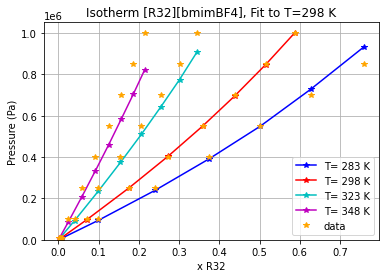

In [13]:
# plots with data - model as lines --- need to make this into a function that splits up the T's
plt.plot(R32_x[0:7],P[0:7],"b*-",label="T= 283 K")  
plt.plot(R32_x[7:15],P[7:15],"r*-",label="T= 298 K") 
plt.plot(R32_x[15:23],P[15:23],"c*-",label="T= 323 K") 
plt.plot(R32_x[23:],P[23:],"m*-",label="T= 348 K")
plt.plot(data["x_R32"],data["pressure"],"*",color='orange',label="data")  
plt.title('Isotherm [R32][bmimBF4], Fit to T=298 K')
plt.ylabel('Pressure (Pa)')
plt.xlabel('x R32')
plt.grid(True)
plt.ylim(0,)
plt.legend()
plt.show()

### T= 323 K

In [14]:
# from HFC32_emimTf2N_PR import configuration
binary_params_peng(data_323, configuration, 'R32', 'bmimBF4', "x_R32", "x_bmimBF4", 
    init_temp = 323.2, init_press = 399600, init_x_c1 = 0.154 , init_x_c2 = 0.846 ,
    init_kappa_2_1 = 0.097, init_kappa_1_2 =  0.02, eps = 0.1, scaling_fac = 1e-9, read=False)

2021-04-06 15:39:42 [INFO] idaes.generic_models.properties.core.generic.generic_property: DEPRECATED - definiton of generic property packages is moving to using static classes instead of modules. Please refer to the IDAES documentation.
2021-04-06 15:39:42 [INFO] idaes.init.fs.state_block: Property package initialization: optimal - Optimal Solution Found.
2021-04-06 15:39:42 [INFO] idaes.generic_models.properties.core.generic.generic_property: DEPRECATED - definiton of generic property packages is moving to using static classes instead of modules. Please refer to the IDAES documentation.
2021-04-06 15:39:42 [INFO] idaes.init.fs.state_block: Property package initialization: optimal - Optimal Solution Found.
2021-04-06 15:39:42 [INFO] idaes.generic_models.properties.core.generic.generic_property: DEPRECATED - definiton of generic property packages is moving to using static classes instead of modules. Please refer to the IDAES documentation.
2021-04-06 15:39:42 [INFO] idaes.init.fs.state_

In [15]:
k12_323 = 0.0017676532608226227
k21_323 = -0.2570282763493638

In [16]:
R32_x,P= calc_outlet_xP(data,m,"R32", "bmimBF4", k21_323, k12_323,verbose=True)

    'pyomo.core.base.param.SimpleParam'>) on block fs with a new Component
    (type=<class 'pyomo.core.base.param.SimpleParam'>). This is usually
    indicative of a modelling error. To avoid this warning, use
    block.del_component() and block.add_component().
    'pyomo.core.base.constraint.SimpleConstraint'>) on block fs with a new
    Component (type=<class
    'pyomo.core.base.constraint.AbstractSimpleConstraint'>). This is usually
    indicative of a modelling error. To avoid this warning, use
    block.del_component() and block.add_component().
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The

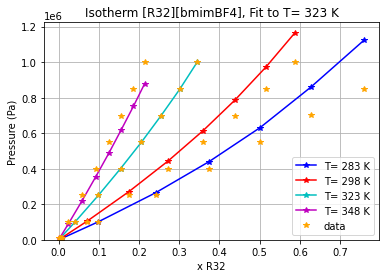

In [17]:
# plots with data - model as lines --- need to make this into a function that splits up the T's
plt.plot(R32_x[0:7],P[0:7],"b*-",label="T= 283 K")  
plt.plot(R32_x[7:15],P[7:15],"r*-",label="T= 298 K") 
plt.plot(R32_x[15:23],P[15:23],"c*-",label="T= 323 K") 
plt.plot(R32_x[23:],P[23:],"m*-",label="T= 348 K")
plt.plot(data["x_R32"],data["pressure"],"*",color='orange',label="data")  
plt.title('Isotherm [R32][bmimBF4], Fit to T= 323 K')
plt.ylabel('Pressure (Pa)')
plt.xlabel('x R32')
plt.grid(True)
plt.ylim(0,)
plt.legend()
plt.show()

### T= 348 K

In [18]:
print(data_348)

   temperature  pressure  x_R32  x_bmimBF4
0        348.2      9700  0.002      0.998
1        348.1     99600  0.024      0.976
2        348.1    249500  0.058      0.942
3        348.2    399500  0.092      0.908
4        348.1    549500  0.125      0.875
5        348.2    699600  0.156      0.844
6        348.1    849600  0.186      0.814
7        348.1    999900  0.214      0.786


In [19]:
# from HFC32_emimTf2N_PR import configuration
binary_params_peng(data_348, configuration, 'R32', 'bmimBF4', "x_R32", "x_bmimBF4", 
    init_temp = 348.1, init_press = 549500, init_x_c1 = 0.125, init_x_c2 = 0.875,
    init_kappa_2_1 = 0.097, init_kappa_1_2 =  0.02, eps = 0.1, scaling_fac = 1e-9, read=False)

2021-04-06 15:40:12 [INFO] idaes.generic_models.properties.core.generic.generic_property: DEPRECATED - definiton of generic property packages is moving to using static classes instead of modules. Please refer to the IDAES documentation.
2021-04-06 15:40:12 [INFO] idaes.init.fs.state_block: Property package initialization: optimal - Optimal Solution Found.
2021-04-06 15:40:12 [INFO] idaes.generic_models.properties.core.generic.generic_property: DEPRECATED - definiton of generic property packages is moving to using static classes instead of modules. Please refer to the IDAES documentation.
2021-04-06 15:40:12 [INFO] idaes.init.fs.state_block: Property package initialization: optimal - Optimal Solution Found.
2021-04-06 15:40:12 [INFO] idaes.generic_models.properties.core.generic.generic_property: DEPRECATED - definiton of generic property packages is moving to using static classes instead of modules. Please refer to the IDAES documentation.
2021-04-06 15:40:13 [INFO] idaes.init.fs.state_

In [20]:
k12_348 = 0.022367544160091395
k21_348 = -0.32538626875645615

In [21]:
R32_x,P= calc_outlet_xP(data,m,"R32", "bmimBF4", k21_348, k12_348,verbose=True)

    'pyomo.core.base.param.SimpleParam'>) on block fs with a new Component
    (type=<class 'pyomo.core.base.param.SimpleParam'>). This is usually
    indicative of a modelling error. To avoid this warning, use
    block.del_component() and block.add_component().
    'pyomo.core.base.constraint.SimpleConstraint'>) on block fs with a new
    Component (type=<class
    'pyomo.core.base.constraint.AbstractSimpleConstraint'>). This is usually
    indicative of a modelling error. To avoid this warning, use
    block.del_component() and block.add_component().
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
    model.name="unknown";
      - termination condition: infeasible
      - message from solver: Ipopt 3.13.2\x3a Converged to a locally
        infeasible point. Problem may be infeasible.
Infeasible.
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final 

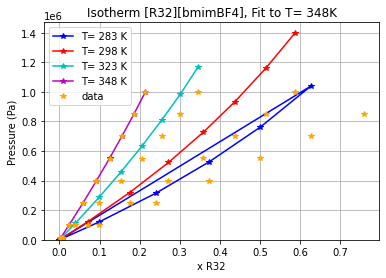

In [22]:
# plots with data - model as lines --- need to make this into a function that splits up the T's
plt.plot(R32_x[0:7],P[0:7],"b*-",label="T= 283 K")  
plt.plot(R32_x[7:15],P[7:15],"r*-",label="T= 298 K") 
plt.plot(R32_x[15:23],P[15:23],"c*-",label="T= 323 K") 
plt.plot(R32_x[23:],P[23:],"m*-",label="T= 348 K")
plt.plot(data["x_R32"],data["pressure"],"*",color='orange',label="data")  
plt.title('Isotherm [R32][bmimBF4], Fit to T= 348K')
plt.ylabel('Pressure (Pa)')
plt.xlabel('x R32')
plt.grid(True)
plt.ylim(0,)
plt.legend()
plt.show()

# K12 vs T

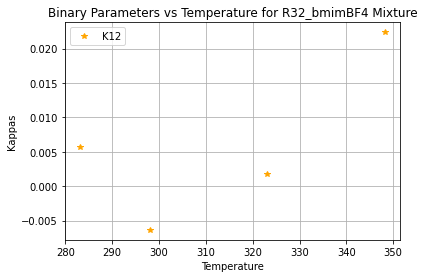

K12 Values for T=  [283.15 298.15 323.15 348.15] are: 
[ 0.00562598 -0.0063687   0.00176765  0.02236754]


In [23]:
K12 = np.array([k12_283, k12_298, k12_323, k12_348])
T = np.array([283.15, 298.15, 323.15, 348.15]) #K
plt.plot(T,K12,"*",color='orange',label="K12") 
plt.title('Binary Parameters vs Temperature for R32_bmimBF4 Mixture')
plt.ylabel('Kappas')
plt.xlabel('Temperature')
plt.grid(True)
plt.legend()
plt.show()

print('K12 Values for T= ', T, 'are: ')
print(K12)

# K21 vs T

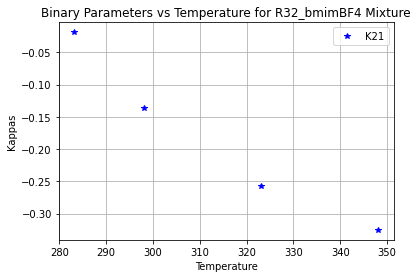

K21 Values for T=  [283.15 298.15 323.15 348.15] are: 
[-0.01895073 -0.13572948 -0.25702828 -0.32538627]


In [24]:
K21 = np.array([k21_283, k21_298, k21_323, k21_348])
plt.plot(T,K21,"*",color='blue',label="K21")
plt.title('Binary Parameters vs Temperature for R32_bmimBF4 Mixture')
plt.ylabel('Kappas')
plt.xlabel('Temperature')
plt.grid(True)
plt.legend()
plt.show()

print('K21 Values for T= ', T, 'are: ')
print(K21)

## Best Fit

In [25]:
binary_params_peng(data, configuration, 'R32', 'bmimBF4', "x_R32", "x_bmimBF4", 
    init_temp = 298, init_press = 399900, init_x_c1 = 0.272 , init_x_c2 = 0.728 ,
    init_kappa_2_1 = 0.097, init_kappa_1_2 =  0.02, eps = 0.1, scaling_fac = 1e-9, read=False)

2021-04-06 15:40:47 [INFO] idaes.generic_models.properties.core.generic.generic_property: DEPRECATED - definiton of generic property packages is moving to using static classes instead of modules. Please refer to the IDAES documentation.
2021-04-06 15:40:47 [INFO] idaes.init.fs.state_block: Property package initialization: optimal - Optimal Solution Found.
2021-04-06 15:40:47 [INFO] idaes.generic_models.properties.core.generic.generic_property: DEPRECATED - definiton of generic property packages is moving to using static classes instead of modules. Please refer to the IDAES documentation.
2021-04-06 15:40:48 [INFO] idaes.init.fs.state_block: Property package initialization: optimal - Optimal Solution Found.
2021-04-06 15:40:48 [INFO] idaes.generic_models.properties.core.generic.generic_property: DEPRECATED - definiton of generic property packages is moving to using static classes instead of modules. Please refer to the IDAES documentation.
2021-04-06 15:40:48 [INFO] idaes.init.fs.state_

2021-04-06 15:40:53 [INFO] idaes.generic_models.properties.core.generic.generic_property: DEPRECATED - definiton of generic property packages is moving to using static classes instead of modules. Please refer to the IDAES documentation.
2021-04-06 15:40:53 [INFO] idaes.init.fs.state_block: Property package initialization: optimal - Optimal Solution Found.
2021-04-06 15:40:54 [INFO] idaes.generic_models.properties.core.generic.generic_property: DEPRECATED - definiton of generic property packages is moving to using static classes instead of modules. Please refer to the IDAES documentation.
2021-04-06 15:40:54 [INFO] idaes.init.fs.state_block: Property package initialization: optimal - Optimal Solution Found.
2021-04-06 15:40:54 [INFO] idaes.generic_models.properties.core.generic.generic_property: DEPRECATED - definiton of generic property packages is moving to using static classes instead of modules. Please refer to the IDAES documentation.
2021-04-06 15:40:54 [INFO] idaes.init.fs.state_

In [26]:
k12 = 0.01971268539125869
k21 = 0.05731833242289427

In [27]:
R32_x,P= calc_outlet_xP(data,m,"R32", "bmimBF4", k21, k12,verbose=True)

    'pyomo.core.base.param.SimpleParam'>) on block fs with a new Component
    (type=<class 'pyomo.core.base.param.SimpleParam'>). This is usually
    indicative of a modelling error. To avoid this warning, use
    block.del_component() and block.add_component().
    'pyomo.core.base.constraint.SimpleConstraint'>) on block fs with a new
    Component (type=<class
    'pyomo.core.base.constraint.AbstractSimpleConstraint'>). This is usually
    indicative of a modelling error. To avoid this warning, use
    block.del_component() and block.add_component().
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The

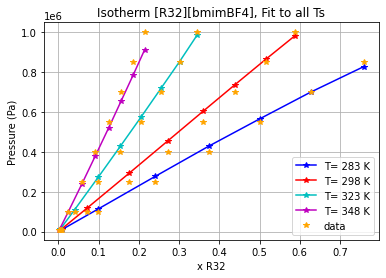

k12=  0.01971268539125869
k21=  0.05731833242289427


In [30]:
# plots with data - model as lines --- need to make this into a function that splits up the T's
plt.plot(R32_x[0:7],P[0:7],"b*-",label="T= 283 K")  
plt.plot(R32_x[7:15],P[7:15],"r*-",label="T= 298 K") 
plt.plot(R32_x[15:23],P[15:23],"c*-",label="T= 323 K") 
plt.plot(R32_x[23:],P[23:],"m*-",label="T= 348 K")
plt.plot(data["x_R32"],data["pressure"],"*",color='orange',label="data")  
plt.title('Isotherm [R32][bmimBF4], Fit to all Ts')
plt.ylabel('Pressure (Pa)')
plt.xlabel('x R32')
plt.grid(True)
plt.legend()
plt.show()
print('k12= ', k12)
print('k21= ', k21)